# Import Libraries

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, chi2_contingency

#cluster analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from yellowbrick.cluster import SilhouetteVisualizer

#model saving
import json

# Data Loading

In [25]:
df = pd.read_csv('data.csv')
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False


In [26]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [2]:
teams = pd.read_csv('data_selected.csv')
teams

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89985,IT,Female,56,Engineer,2024-07-04 08:03:05.556036,0,Bachelor,1,6600.0,57,29,27,14,75,5,22,1,4.01
89986,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28
89987,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60
89988,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10


# Feature Engineering

## Cek Cardinality

In [3]:
pd.set_option('display.max_colwidth', None)

num_cols = teams.select_dtypes(include=['float']).columns
cat_cols = teams.select_dtypes(exclude=['float']).columns

listItem = []
for col in cat_cols:
    listItem.append([col, teams[col].nunique(), teams[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Department,9,"[IT, Finance, Customer Support, Engineering, Marketing, HR, Operations, Sales, Legal]"
1,Gender,3,"[Male, Female, Other]"
2,Age,39,"[55, 29, 48, 36, 43, 37, 45, 52, 27, 51, 46, 26, 28, 56, 23, 33, 59, 58, 38, 53, 24, 25, 41, 42, 60, 32, 31, 40, 57, 35, 34, 54, 49, 39, 47, 50, 22, 30, 44]"
3,Job_Title,7,"[Specialist, Developer, Analyst, Manager, Technician, Engineer, Consultant]"
4,Hire_Date,3650,"[2022-01-19 08:03:05.556036, 2024-04-18 08:03:05.556036, 2015-10-26 08:03:05.556036, 2016-10-22 08:03:05.556036, 2021-07-23 08:03:05.556036, 2016-08-14 08:03:05.556036, 2023-08-28 08:03:05.556036, 2014-10-27 08:03:05.556036, 2023-06-29 08:03:05.556036, 2016-12-23 08:03:05.556036, 2019-11-26 08:03:05.556036, 2015-02-19 08:03:05.556036, 2019-07-04 08:03:05.556036, 2014-10-14 08:03:05.556036, 2023-03-11 08:03:05.556036, 2023-04-19 08:03:05.556036, 2019-09-21 08:03:05.556036, 2022-11-08 08:03:05.556036, 2015-10-01 08:03:05.556036, 2015-05-08 08:03:05.556036, 2022-12-19 08:03:05.556036, 2017-05-25 08:03:05.556036, 2016-07-23 08:03:05.556036, 2018-01-21 08:03:05.556036, 2018-06-23 08:03:05.556036, 2022-05-03 08:03:05.556036, 2021-07-12 08:03:05.556036, 2022-04-17 08:03:05.556036, 2023-06-21 08:03:05.556036, 2018-05-14 08:03:05.556036, 2023-06-12 08:03:05.556036, 2024-06-13 08:03:05.556036, 2021-09-11 08:03:05.556036, 2019-05-23 08:03:05.556036, 2019-10-12 08:03:05.556036, 2024-04-04 08:03:05.556036, 2015-01-13 08:03:05.556036, 2022-02-03 08:03:05.556036, 2023-04-11 08:03:05.556036, 2021-10-31 08:03:05.556036, 2016-08-11 08:03:05.556036, 2021-05-21 08:03:05.556036, 2021-03-03 08:03:05.556036, 2016-06-12 08:03:05.556036, 2021-04-03 08:03:05.556036, 2023-11-23 08:03:05.556036, 2016-06-02 08:03:05.556036, 2020-01-24 08:03:05.556036, 2019-09-13 08:03:05.556036, 2017-03-21 08:03:05.556036, 2015-06-03 08:03:05.556036, 2015-10-24 08:03:05.556036, 2021-11-25 08:03:05.556036, 2019-07-21 08:03:05.556036, 2019-09-05 08:03:05.556036, 2017-07-11 08:03:05.556036, 2018-05-23 08:03:05.556036, 2018-11-19 08:03:05.556036, 2024-07-16 08:03:05.556036, 2017-01-03 08:03:05.556036, 2024-08-14 08:03:05.556036, 2016-07-21 08:03:05.556036, 2015-11-26 08:03:05.556036, 2023-01-13 08:03:05.556036, 2023-07-17 08:03:05.556036, 2023-01-08 08:03:05.556036, 2020-01-18 08:03:05.556036, 2024-04-29 08:03:05.556036, 2018-04-11 08:03:05.556036, 2017-05-24 08:03:05.556036, 2020-10-17 08:03:05.556036, 2019-02-20 08:03:05.556036, 2024-05-07 08:03:05.556036, 2021-06-23 08:03:05.556036, 2016-03-23 08:03:05.556036, 2015-09-16 08:03:05.556036, 2015-02-11 08:03:05.556036, 2019-11-14 08:03:05.556036, 2019-07-05 08:03:05.556036, 2023-11-06 08:03:05.556036, 2018-01-19 08:03:05.556036, 2023-11-09 08:03:05.556036, 2021-04-23 08:03:05.556036, 2015-07-06 08:03:05.556036, 2015-04-14 08:03:05.556036, 2015-12-31 08:03:05.556036, 2019-11-15 08:03:05.556036, 2017-12-29 08:03:05.556036, 2018-01-20 08:03:05.556036, 2019-05-21 08:03:05.556036, 2021-09-13 08:03:05.556036, 2020-12-17 08:03:05.556036, 2015-01-26 08:03:05.556036, 2018-08-02 08:03:05.556036, 2018-09-23 08:03:05.556036, 2023-09-08 08:03:05.556036, 2018-11-06 08:03:05.556036, 2017-05-07 08:03:05.556036, 2024-06-07 08:03:05.556036, 2023-06-08 08:03:05.556036, ...]"
5,Years_At_Company,11,"[2, 0, 8, 7, 3, 1, 9, 4, 5, 6, 10]"
6,Education_Level,4,"[High School, Bachelor, Master, PhD]"
7,Performance_Score,5,"[5, 3, 2, 1, 4]"
8,Work_Hours_Per_Week,31,"[33, 34, 37, 52, 38, 46, 55, 42, 51, 41, 39, 31, 43, 47, 57, 30, 48, 50, 59, 45, 44, 53, 58, 32, 40, 54, 36, 35, 56, 49, 60]"
9,Projects_Handled,50,"[32, 34, 27, 10, 11, 31, 20, 46, 23, 33, 1, 13, 30, 49, 41, 26, 36, 9, 0, 28, 22, 40, 2, 21, 24, 25, 15, 42, 6, 7, 48, 19, 18, 17, 44, 29, 37, 12, 38, 16, 45, 4, 8, 5, 14, 3, 43, 35, 39, 47]"


## Splitting Num Cols & Cat Cols

In [4]:
teams_num = teams[num_cols]
teams_cat = teams[cat_cols]
teams_cat

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions
0,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,33,32,22,2,0,14,66,0
1,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,34,34,13,14,100,12,61,2
2,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,37,27,6,3,50,10,1,0
3,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,52,10,28,12,100,10,0,1
4,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,38,11,29,13,100,15,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89985,IT,Female,56,Engineer,2024-07-04 08:03:05.556036,0,Bachelor,1,57,29,27,14,75,5,22,1
89986,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,55,46,5,3,75,16,48,2
89987,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,31,13,6,5,0,5,87,1
89988,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,35,43,10,1,75,2,31,1


## Dimensionality Reduction

In [ ]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), num_cols),     # Scaling untuk kolom numerik
#         ('cat', OneHotEncoder(), cat_cols)     # One-hot encoding untuk kolom kategorikal
#     ]
# )

In [35]:
num_cols

Index(['Monthly_Salary', 'Employee_Satisfaction_Score'], dtype='object')

In [5]:
scaler = StandardScaler()
teams_scaled = scaler.fit_transform(teams_num)

#menggabungkan kembali kolom-kolom yang telah discaling
# teams_scaled_final = np.concatenate([teams_num, teams_unused], axis=1) 

# Dimensionality Reduction using PCA


pca = PCA()
pca.fit(teams_scaled)

PCA()

In [8]:
num_components = len(pca.explained_variance_ratio_)
num_components

2

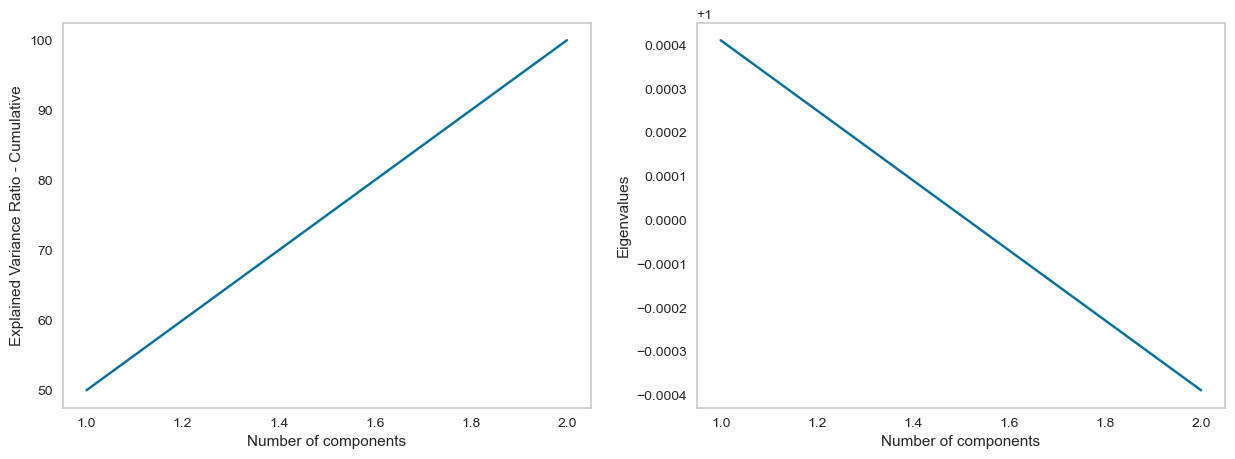

In [9]:
num_components = len(pca.explained_variance_ratio_)  # Panjang sebenarnya dari PCA

# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))

# Subplot 1: Cummulative Explained Variance Ratio
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))  # Sesuaikan panjang x
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cumulative')

# Subplot 2: Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, num_components + 1), pca.explained_variance_)  # Sesuaikan panjang x
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

plt.show()


In [44]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95)+1
num_features

2

cuma perlu 2 kolom ternyata (?)

In [45]:
pca_final = PCA(n_components=0.95)
pca_final.fit(teams_scaled)

teams_scaled_pca = pca_final.fit_transform(teams_scaled)

In [46]:
teams_scaled_pca

array([[ 0.4056933 , -0.04919105],
       [ 1.35109512, -0.22203159],
       [-0.38962966, -0.18094163],
       ...,
       [-0.5802038 , -1.07195329],
       [ 0.88947772,  1.0121471 ],
       [-0.8107969 , -1.25339288]])

# Cluster Analysis

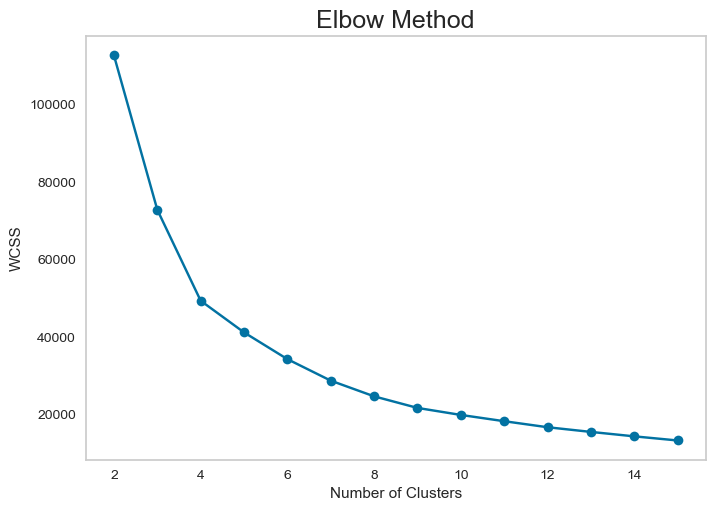

In [47]:
#nilai wcss digunakan untuk mengukur total variance pada cluster
wcss = []
random_state = 0
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state=random_state)
    km.fit(teams_scaled_pca)
    wcss.append(km.inertia_)

#plotting Elbow Method berdasarkan nilai WCSS dan jumlah clusters
plt.plot(range(2, max_cluster+1), wcss, marker='o')
plt.grid()
#fungsi di bawah digunakan untuk menentukan judul statistik
#nilai size menentukan ukuran statistik
plt.title('Elbow Method', size=18)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## Silhoute Score & Silhoute Plot

In [48]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        #subplot untuk 1 baris dan 2 kolom
        fig, (ax1, ax2) = plt.subplots(1,2)
        fig.set_size_inches(18,4)

        ax1.set_xlim([-0.1, 1])
        #(n_clusters+1)*10 berguna untuk mengisi blank space antar silhouete plot dari individual clusters, untuk membatasi keduanya dengan jelas
        ax1.set_ylim([0,len(X)+(n_clusters + 1) *10])

        
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300,
                           n_init=10, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            
            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Plotingan kedua
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        
        centers = clusterer.cluster_centers_

        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.35526752386579386
For n_clusters = 3 The average silhouette_score is : 0.3672237897037853
For n_clusters = 4 The average silhouette_score is : 0.38063977612760347
For n_clusters = 5 The average silhouette_score is : 0.36599794526693785
For n_clusters = 6 The average silhouette_score is : 0.3507232762679114
For n_clusters = 7 The average silhouette_score is : 0.3661409306290759
For n_clusters = 8 The average silhouette_score is : 0.36394646806436204
For n_clusters = 9 The average silhouette_score is : 0.3623375996306616
For n_clusters = 10 The average silhouette_score is : 0.35923608968855336
For n_clusters = 11 The average silhouette_score is : 0.35618047827215965
For n_clusters = 12 The average silhouette_score is : 0.3612586285753536
For n_clusters = 13 The average silhouette_score is : 0.3580571134523983
For n_clusters = 14 The average silhouette_score is : 0.3499972114325273


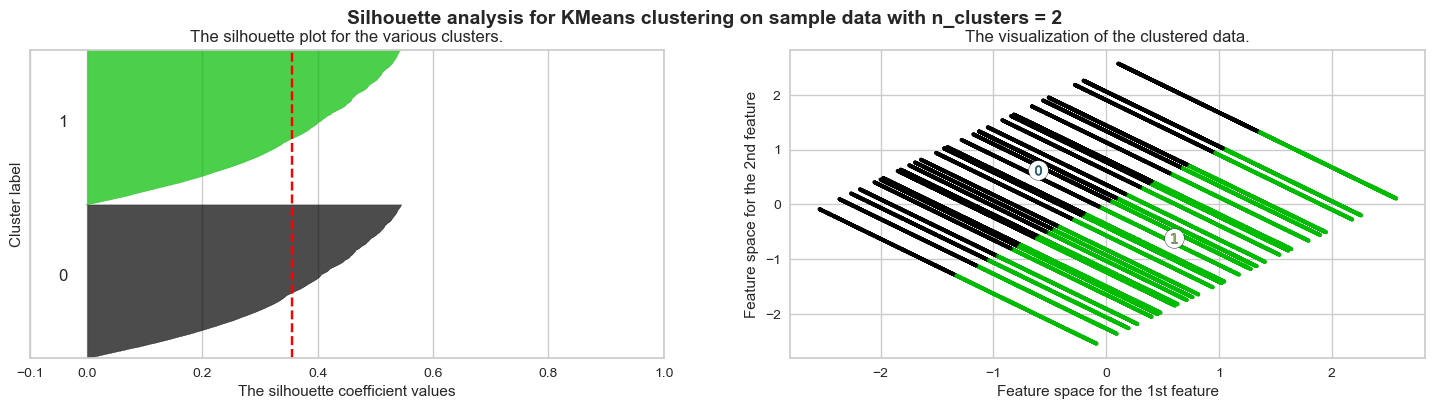

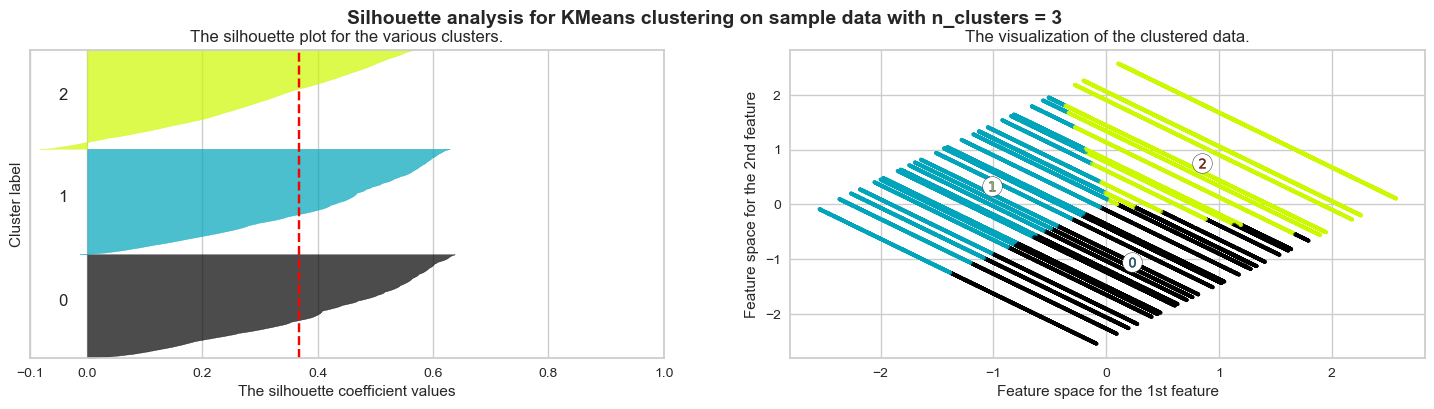

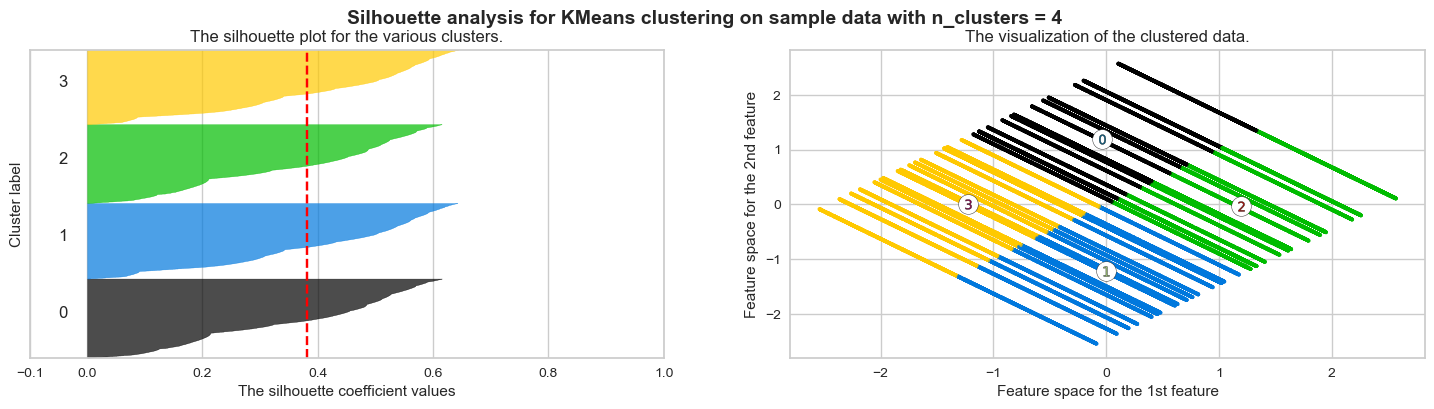

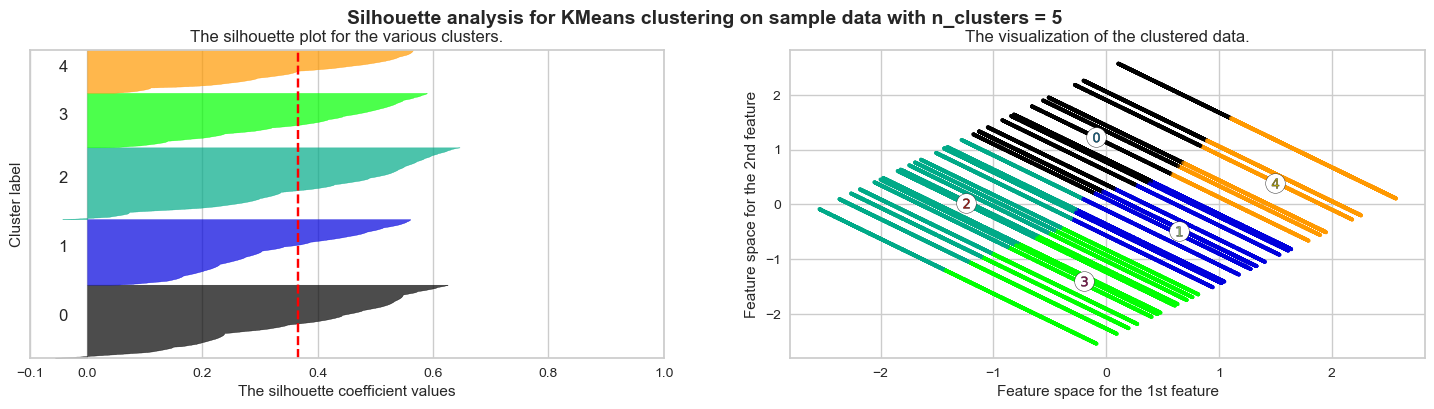

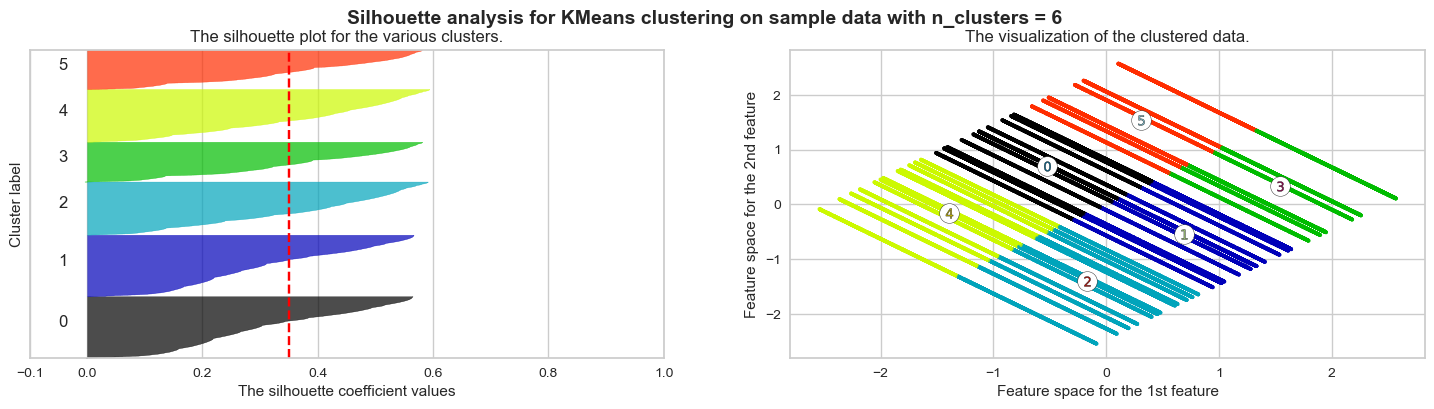

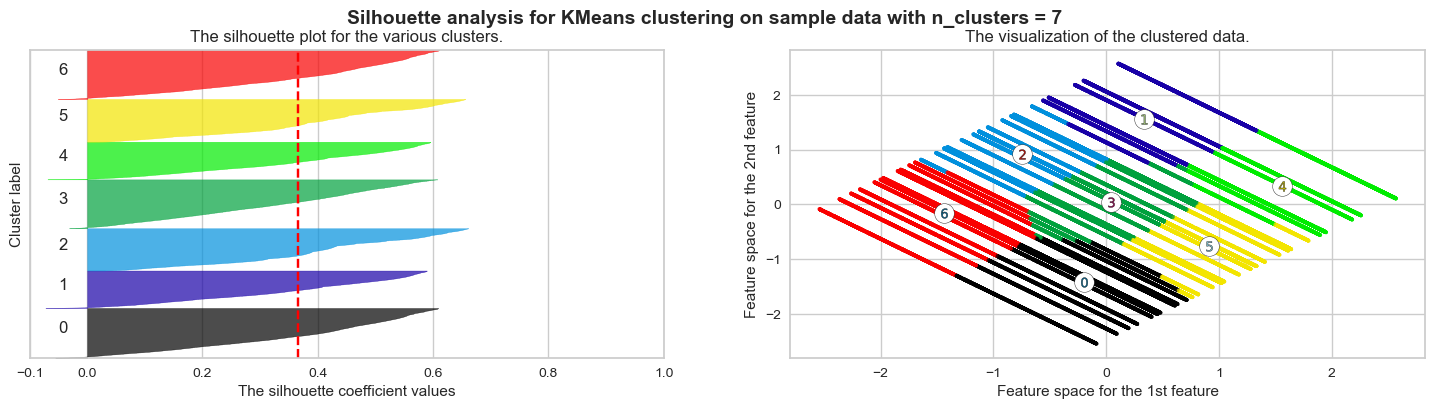

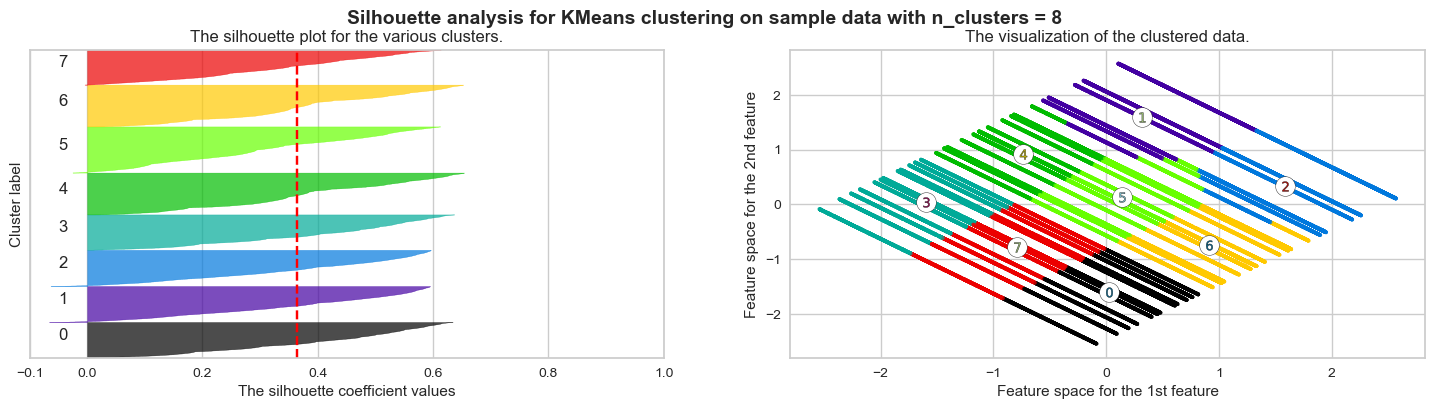

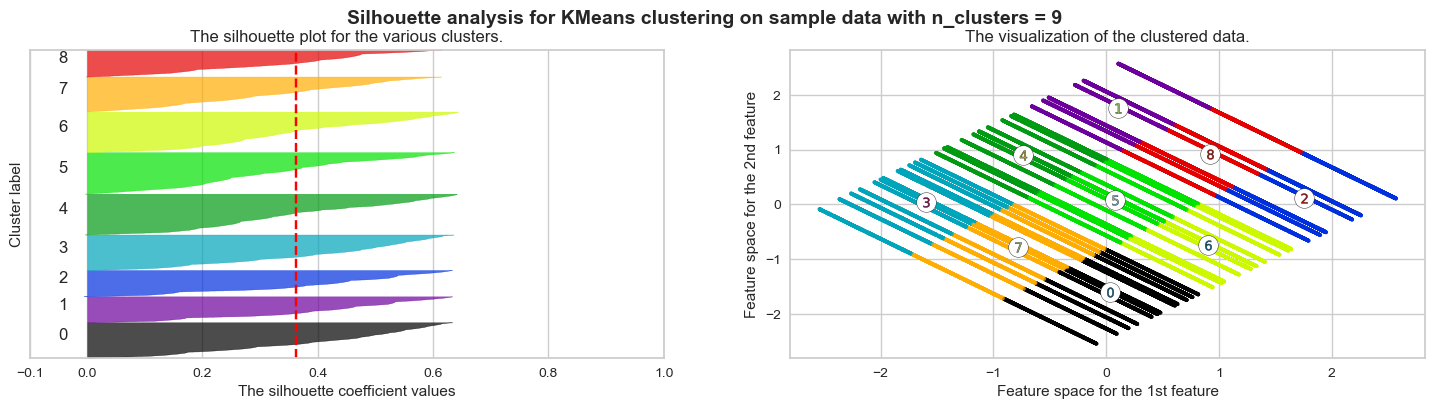

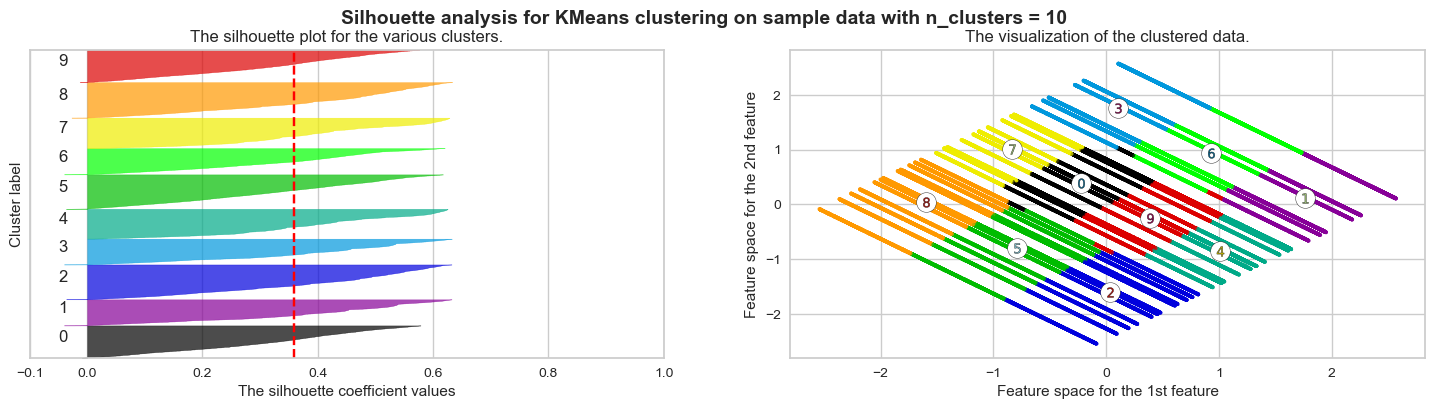

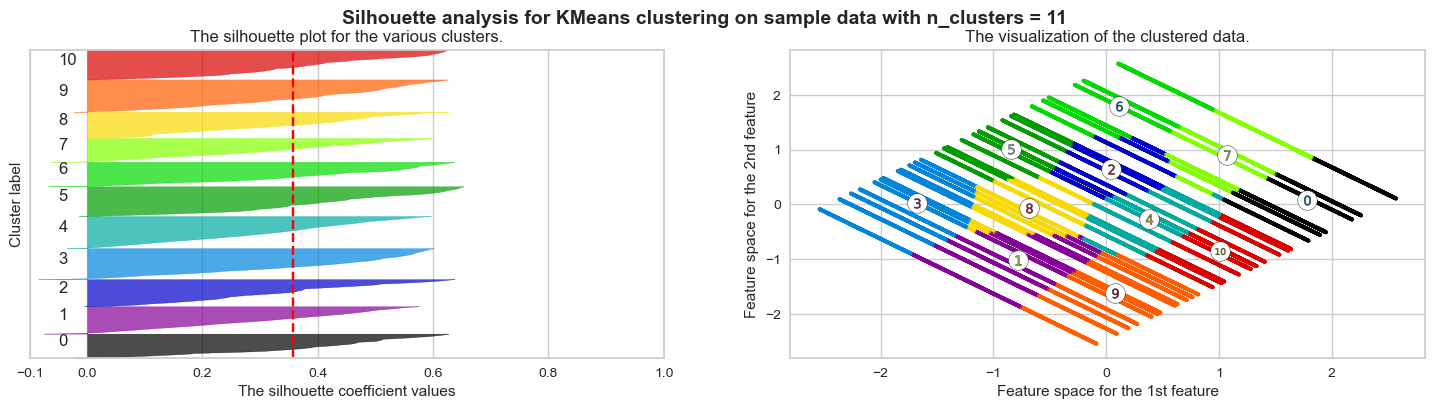

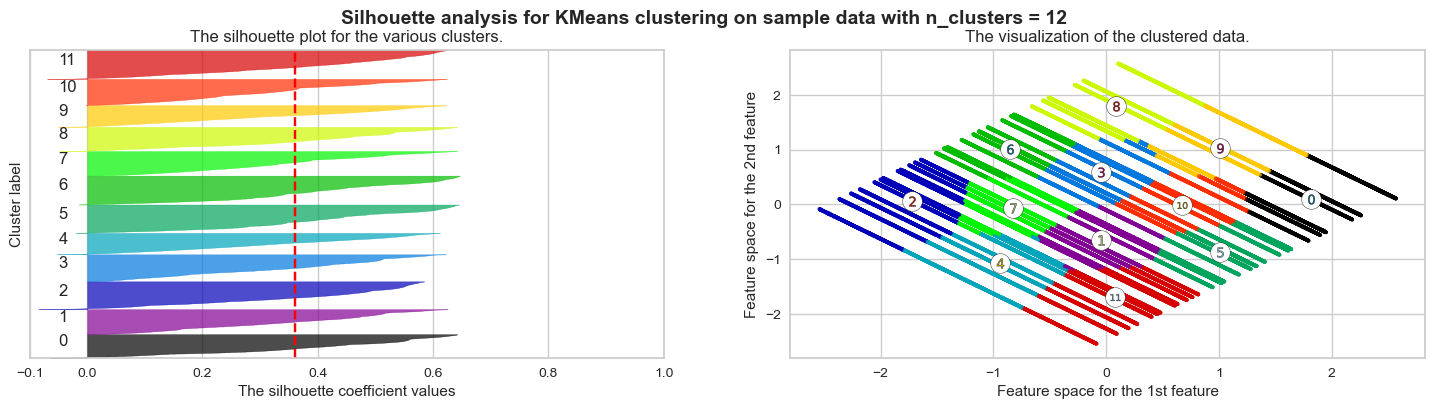

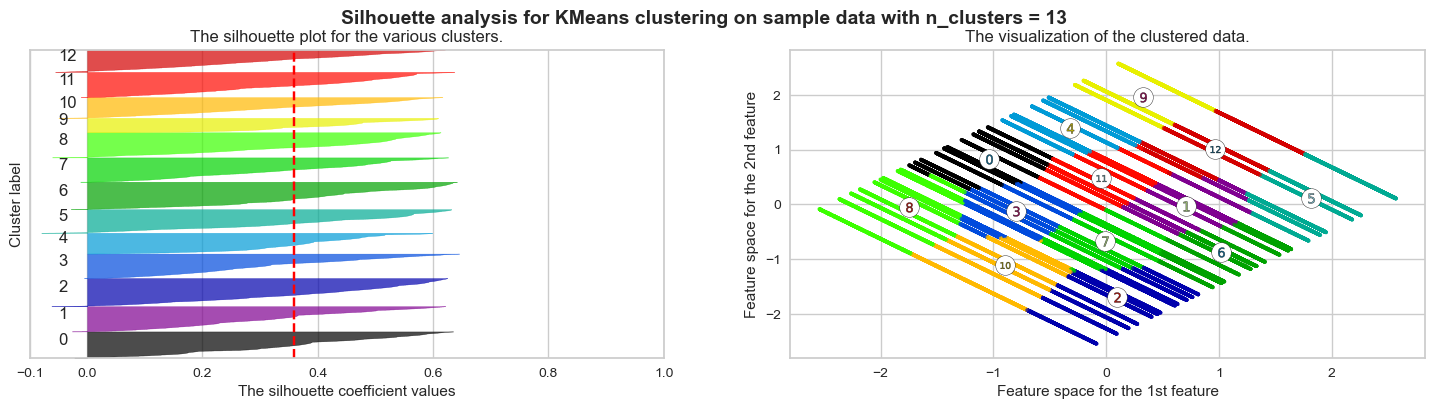

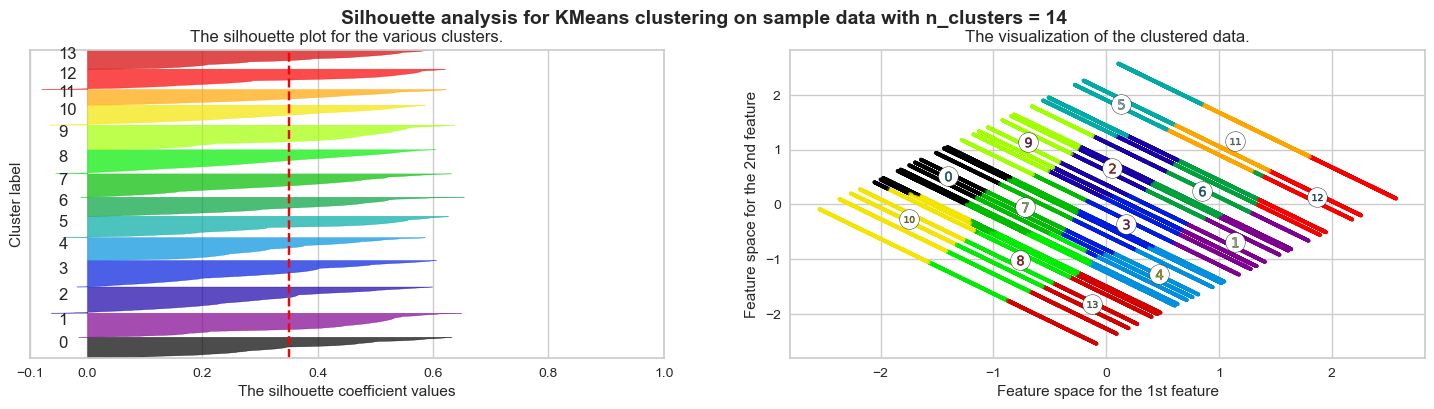

In [49]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), teams_scaled_pca, random_state)

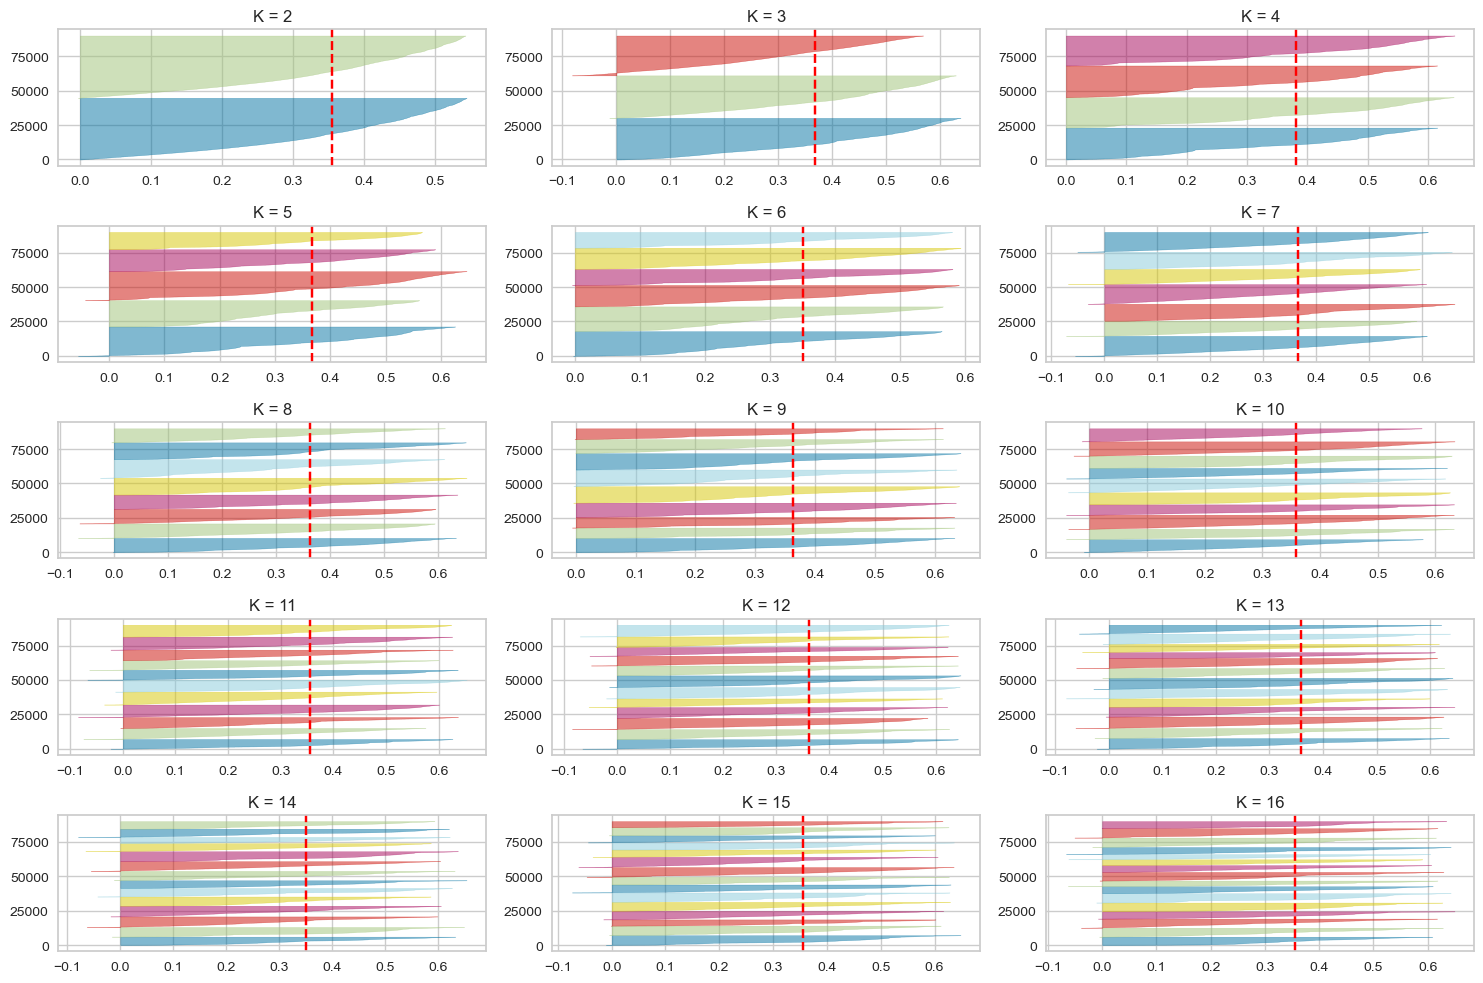

In [50]:
# Display the Silhouette Score and Plot Silhouette Plot


fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(teams_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

# Model Training

In [51]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(teams_scaled_pca)
pred

array([2, 2, 3, ..., 1, 0, 1])

In [52]:
teams['cluster']=pred
teams

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,cluster
0,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,2
1,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,2
2,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,3
3,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,1
4,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89985,IT,Female,56,Engineer,2024-07-04 08:03:05.556036,0,Bachelor,1,6600.0,57,29,27,14,75,5,22,1,4.01,0
89986,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,1
89987,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,1
89988,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,0


In [53]:
teams['cluster'].unique()

array([2, 3, 1, 0])

<Axes: >

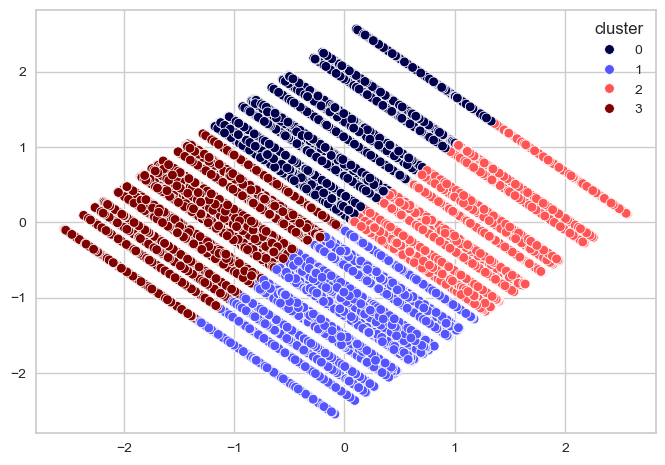

In [54]:
pca_2nd = PCA(n_components=2)
pca_2nd.fit(teams_scaled)

teams_scaled_pca_2nd = pca_2nd.fit_transform(teams_scaled)

sns.scatterplot(x=teams_scaled_pca_2nd[:,0], y=teams_scaled_pca_2nd[:,1], hue=teams['cluster'], palette='seismic')

# DBSCAN

## Dimensionality Reduction

In [57]:
len(cat_cols)

16

In [55]:
num_cols

Index(['Monthly_Salary', 'Employee_Satisfaction_Score'], dtype='object')

In [7]:
# Pipelines untuk numerik dan kategorikal
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputer untuk menangani NaN
    ('scaler', StandardScaler())                   # Scaling fitur numerik
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputer untuk kategorikal
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # Encoding kategorikal
])

# Gabungkan pipeline ke dalam ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Pipeline utama
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca2', PCA(n_components=0.95, svd_solver='covariance_eigh'))  # PCA setelah preprocessing
])

# Terapkan pipeline ke dataset
teams_scaled_pca = pipeline.fit_transform(teams)

print("Hasil PCA:", teams_scaled_pca)


Hasil PCA: [[ 3.25818415e-01 -3.26011334e-01  7.30344199e-01 ... -1.64725011e-03
  -1.25198616e-03  1.70305062e-03]
 [ 8.93001992e-01 -1.12129703e+00  7.31215669e-01 ... -6.74809557e-04
   5.65656921e-03  2.04513662e-03]
 [-4.28205137e-01  1.45824194e-01  7.24272907e-01 ... -1.90626262e-03
  -4.22987518e-03 -1.77016408e-03]
 ...
 [-1.26595297e+00 -3.46464231e-01  7.25572500e-01 ... -7.88617719e-04
  -9.92913148e-04  1.35999609e-04]
 [ 1.46157213e+00  1.00534330e-01 -6.71845173e-01 ...  2.30899772e-03
  -1.07890982e-03 -2.44457410e-03]
 [-1.60617899e+00 -3.05559537e-01 -6.99756358e-01 ...  5.62547879e-03
   1.57333116e-02  1.36940109e-04]]


In [8]:
pca = PCA()
pca.fit(teams_scaled_pca)

PCA()

In [9]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

260

## Optimal Hyperparameters

In [10]:
# Check the value of `min_samples`

min_samples = teams_scaled_pca.shape[1]+1
print('min_samples : ', min_samples)

min_samples :  879


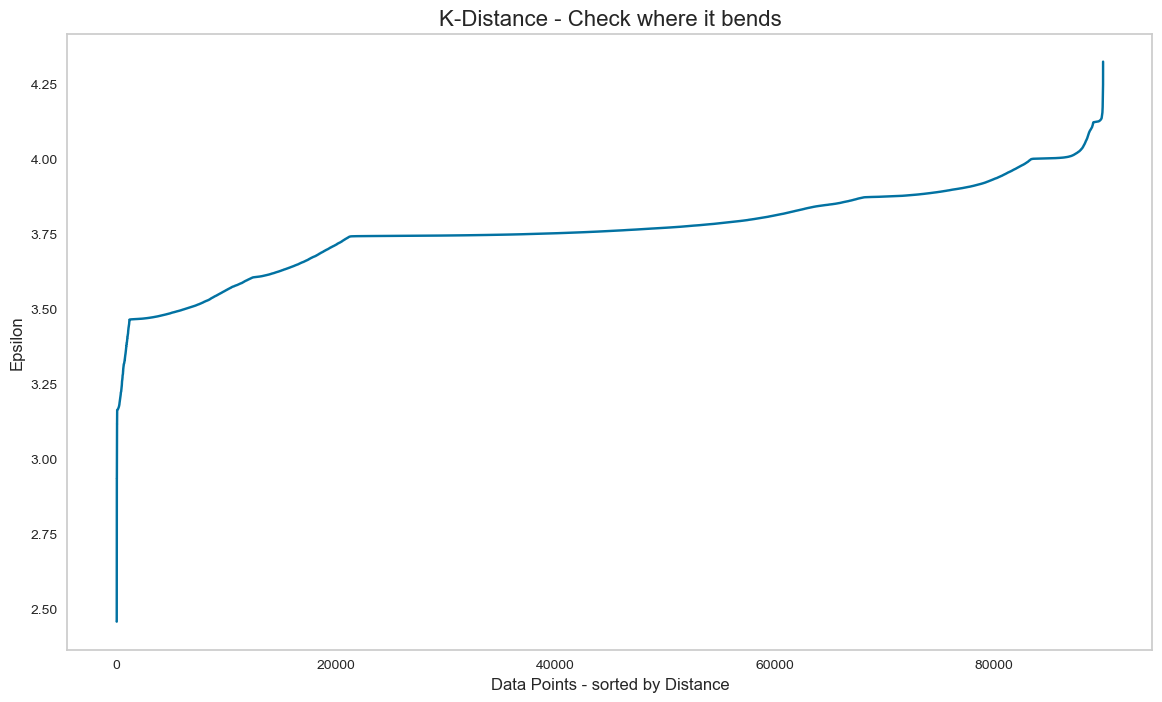

In [11]:
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(teams_scaled_pca)
distances, indices = nbrs.kneighbors(teams_scaled_pca)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(14,8))
plt.grid()
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon', fontsize=12)
plt.show()

eps_min = 4
eps_max = 4.25

In [ ]:
## Define the `eps`
start_eps = 4
end_eps = 4.25
number_eps = 50 # Number of `eps` combination to try
outlier_percent = []
clusters_size = []

## Start looping
for eps in np.linspace(start_eps, end_eps, number_eps):

    ## Create Model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(teams_scaled_pca)

    ## Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    ## Get cluster size
    n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

    outlier_percent.append(perc_outliers)
    clusters_size.append(n_clusters)

## Plot the effect of different epsilons
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(np.linspace(start_eps, end_eps, number_eps), outlier_percent)
plt.xlabel("Epsilon Value")
plt.ylabel("Percentage of Points Classified as Outliers")

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(np.linspace(start_eps, end_eps, number_eps), clusters_size)
plt.xlabel("Epsilon Value")
plt.ylabel("Number of Clusters")

plt.show()

# Model Saving

In [14]:
# with open('list_num_cols.txt', 'w') as file_1:
#     json.dump(num_cols, file_1)
# with open('scaler.pkl', 'wb') as file_2:
#     pickle.dump(scaler, file_2)
# with open('pca.pkl', 'wb') as file_3:
#     pickle.dump(pca_2nd, file_3)
# with open('model.pkl', 'wb') as file_4:
#     pickle.dump(km, file_4)